# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Now let's hack the rotated CAPTCHA!

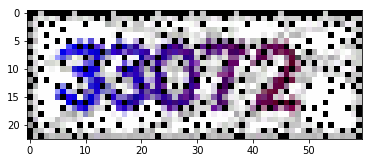

In [2]:
from hack_pca import hack_pca
# Hack different images yourself
img = hack_pca('1.gif')

plt.imshow(img)

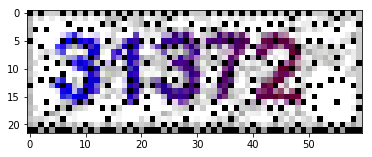

In [3]:
img = hack_pca('2.gif')
plt.imshow(img)

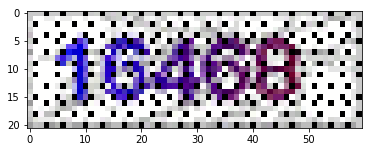

In [4]:
img = hack_pca('3.gif')
plt.imshow(img)

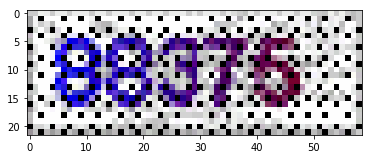

In [5]:
img = hack_pca('4.gif')
plt.imshow(img)

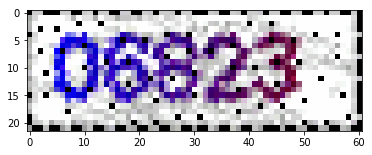

In [6]:
img = hack_pca('5.gif')
plt.imshow(img)

## Apply PCA on face image

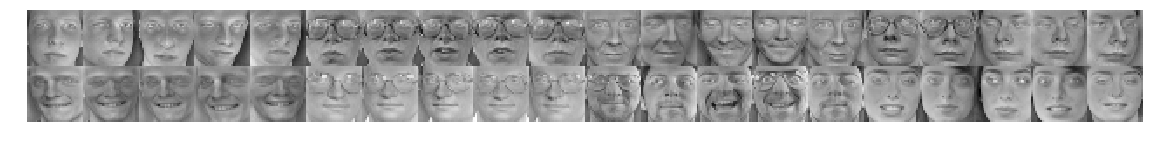

In [7]:
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE

# 1. Feature preprocessing
# begin answer
fea_Train = fea_Train - np.mean(fea_Train, axis=0)
fea_Test = fea_Test - np.mean(fea_Test, axis=0)
# end answer
from show_face import show_face
show_face(fea_Train)

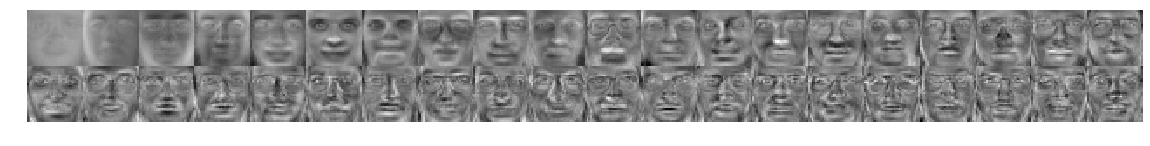

In [8]:
# 2. Run PCA
# begin answer
from pca import PCA
vec, val = PCA(fea_Train)
# end answer
# 3. Visualize eigenface
# begin answer
show_face(vec.T)
# end answer

dimensionality: 8 testing error rate: 0.255
dimensionality: 16 testing error rate: 0.175
dimensionality: 32 testing error rate: 0.155
dimensionality: 64 testing error rate: 0.135
dimensionality: 128 testing error rate: 0.135


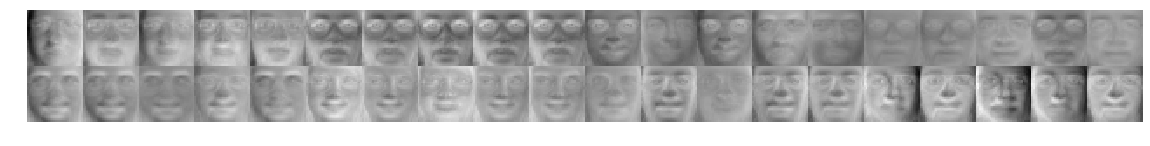

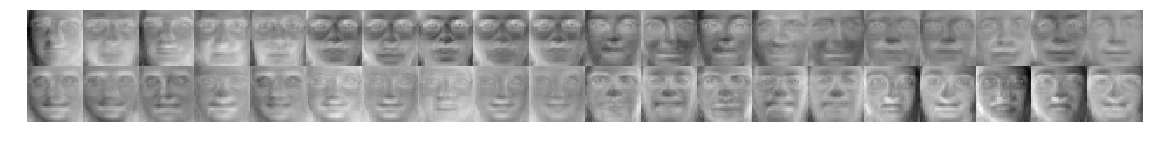

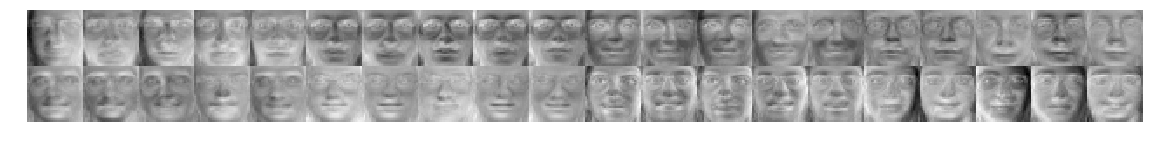

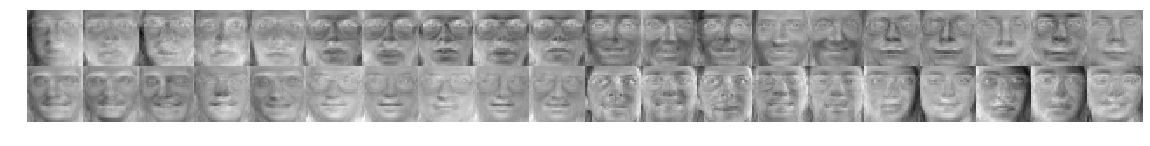

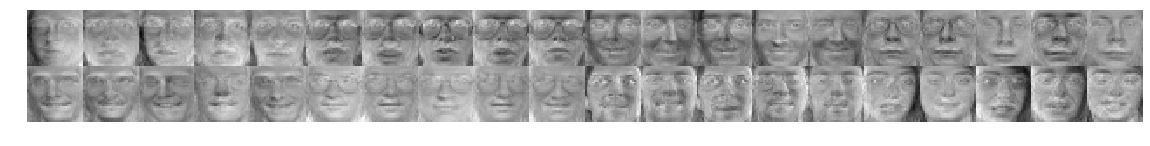

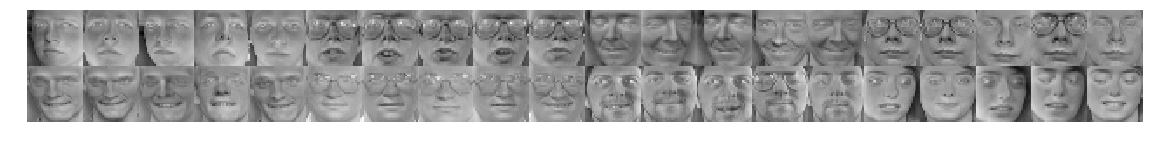

In [9]:
# 4. Project data on to low dimensional space
# begin answer
from knn import knn
for d in [8, 16, 32, 64, 128]:
    emb_Train = np.matmul(fea_Train, vec[:, :d])
    emb_Test = np.matmul(fea_Test, vec[:, :d])
# end answer

# 5. Run KNN in low dimensional space
# begin answer
    pred = knn(emb_Test, emb_Train, gnd_Train, 1)
    cnt = np.ones(pred.shape)
    cnt[pred == gnd_Test] = 0
    err = np.sum(cnt) / cnt.shape[0]
    print('dimensionality:', d, 'testing error rate:', err)
# end answer

# 6. Recover face images form low dimensional space, visualize them
# begin answer
    show_face(np.matmul(emb_Test, vec[:, :d].T))
show_face(fea_Test)
# end answer  

## You are encouraged to apply LDA on this dataset!

In [10]:
from LDA import LDA

# Your code here
vec, val = LDA(fea_Train, gnd_Train)
for d in [8, 16, 32, 64, 128]:
    emb_Train = np.matmul(fea_Train, vec[:, :d])
    emb_Test = np.matmul(fea_Test, vec[:, :d])
    pred = knn(emb_Test, emb_Train, gnd_Train, 1)
    cnt = np.ones(pred.shape)
    cnt[pred == gnd_Test] = 0
    err = np.sum(cnt) / cnt.shape[0]
    print('dimensionality:', d, 'testing error rate:', err)
# end answer  

dimensionality: 8 testing error rate: 0.115
dimensionality: 16 testing error rate: 0.055
dimensionality: 32 testing error rate: 0.045
dimensionality: 64 testing error rate: 0.03
dimensionality: 128 testing error rate: 0.03
